In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing.csv')
df.dropna(how='any', inplace=True)

In [2]:
from sklearn.model_selection import train_test_split
df = df.drop('ocean_proximity', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df.drop('total_bedrooms', axis=1),
                                                    df['total_bedrooms'], test_size=0.3, random_state=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


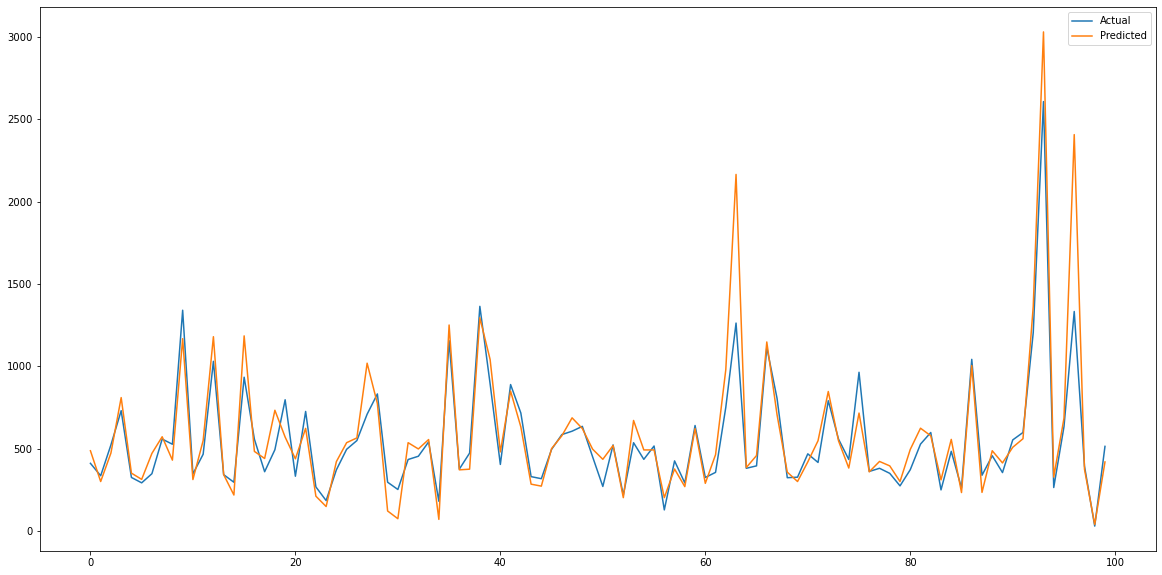

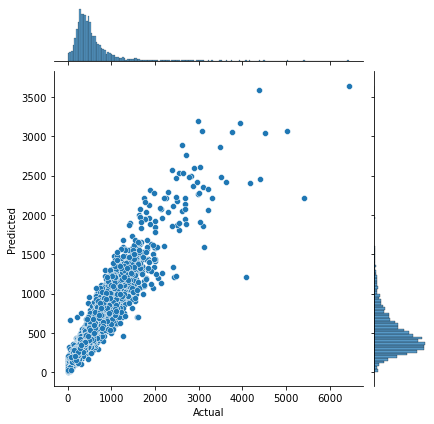

In [11]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

fig = plt.figure(figsize=(20, 10))
test = pd.DataFrame({'Predicted':y_pred, 'Actual':y_test})
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:100])
plt.legend(['Actual', 'Predicted'])
sns.jointplot(x='Actual', y='Predicted', data=test)

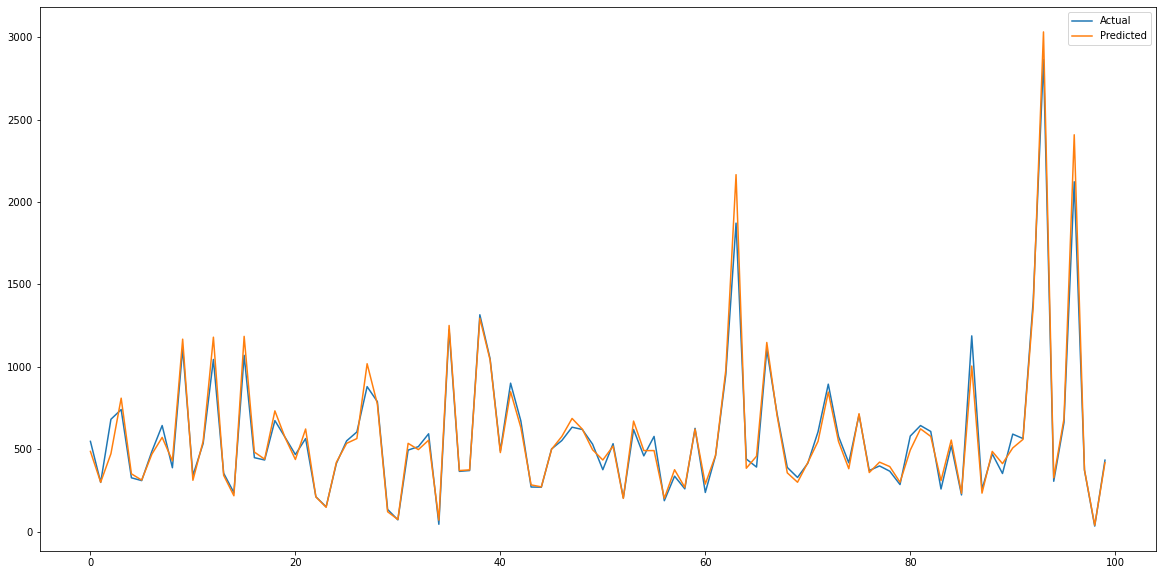

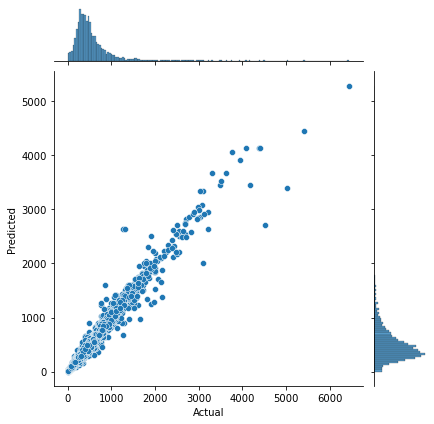

In [4]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

fig = plt.figure(figsize=(20, 10))
test = pd.DataFrame({'Predicted':y_pred, 'Actual':y_test})
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:100])
plt.legend(['Actual', 'Predicted'])
sns.jointplot(x='Actual', y='Predicted', data=test)